In [1]:
import netCDF4 as nc
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
file_path = 'full_data_monthly_v2022_2001_2010_10.nc.gz'

In [3]:
data = xr.open_dataset(file_path)

In [4]:
header_content = data.__str__()
print(header_content)


<xarray.Dataset>
Dimensions:                       (lon: 360, lat: 180, time: 120)
Coordinates:
  * lon                           (lon) float64 -179.5 -178.5 ... 178.5 179.5
  * lat                           (lat) float64 89.5 88.5 87.5 ... -88.5 -89.5
  * time                          (time) datetime64[ns] 2001-01-01 ... 2010-1...
Data variables:
    precip                        (time, lat, lon) float32 ...
    numgauge                      (time, lat, lon) float32 ...
    infilled_numgauges            (time, lat, lon) float32 ...
    interpolation_error           (time, lat, lon) float32 ...
    interpolation_error_infilled  (time, lat, lon) float32 ...
    diff_new_old_method           (time, lat, lon) float32 ...
Attributes: (12/20)
    CDI:                       Climate Data Interface version 1.7.0 (http://m...
    Conventions:               CF-1.4
    history:                   Sat May 28 06:59:08 2022: cdo -setgatts,gattfi...
    title:                     GPCC Full Data Monthl

In [5]:
variable = data['precip']
print(variable)

<xarray.DataArray 'precip' (time: 120, lat: 180, lon: 360)>
[7776000 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2010-12-01
Attributes:
    long_name:  gpcc full data monthly product version 2022, precipitation pe...
    units:      mm/month
    code:       20


In [6]:
grouped_E = variable.groupby('time')
for time, variable in grouped_E:
    print(f"{time}")

2001-01-01T00:00:00.000000000
2001-02-01T00:00:00.000000000
2001-03-01T00:00:00.000000000
2001-04-01T00:00:00.000000000
2001-05-01T00:00:00.000000000
2001-06-01T00:00:00.000000000
2001-07-01T00:00:00.000000000
2001-08-01T00:00:00.000000000
2001-09-01T00:00:00.000000000
2001-10-01T00:00:00.000000000
2001-11-01T00:00:00.000000000
2001-12-01T00:00:00.000000000
2002-01-01T00:00:00.000000000
2002-02-01T00:00:00.000000000
2002-03-01T00:00:00.000000000
2002-04-01T00:00:00.000000000
2002-05-01T00:00:00.000000000
2002-06-01T00:00:00.000000000
2002-07-01T00:00:00.000000000
2002-08-01T00:00:00.000000000
2002-09-01T00:00:00.000000000
2002-10-01T00:00:00.000000000
2002-11-01T00:00:00.000000000
2002-12-01T00:00:00.000000000
2003-01-01T00:00:00.000000000
2003-02-01T00:00:00.000000000
2003-03-01T00:00:00.000000000
2003-04-01T00:00:00.000000000
2003-05-01T00:00:00.000000000
2003-06-01T00:00:00.000000000
2003-07-01T00:00:00.000000000
2003-08-01T00:00:00.000000000
2003-09-01T00:00:00.000000000
2003-10-01

In [7]:
# Reshape the precipitation data to a 2D array
reshaped_precip = data['precip'].values.reshape(data['time'].size, -1)


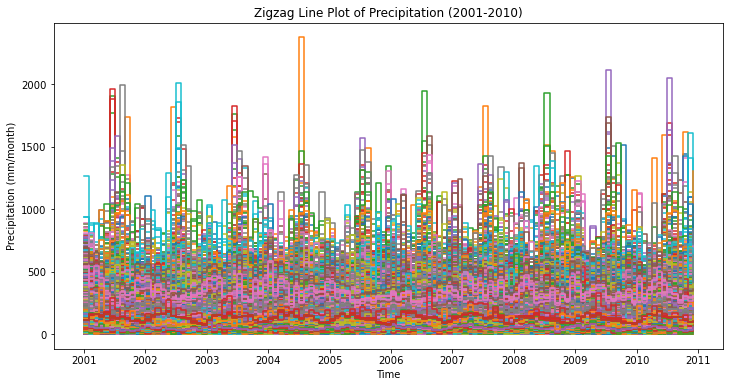

In [8]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series as a zigzag line
ax.plot(data['time'], reshaped_precip, drawstyle='steps-post')

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Precipitation (mm/month)')
ax.set_title('Zigzag Line Plot of Precipitation (2001-2010)')

# Show the plot
plt.show()


In [9]:
# Calculate monthly average precipitation
monthly_avg = data.groupby('time.month').mean(dim='time')

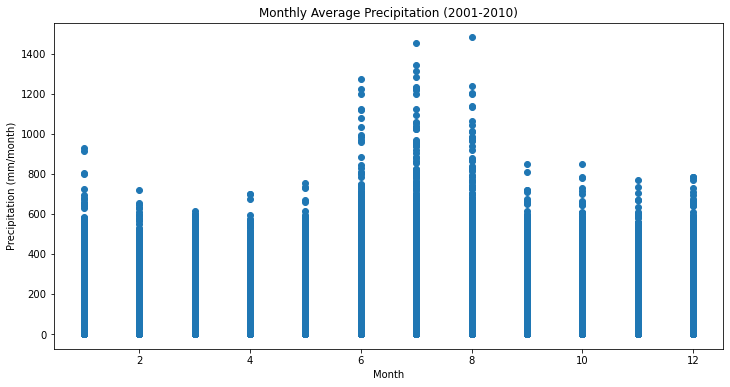

In [10]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the monthly average precipitation
monthly_avg.plot.scatter(ax=ax, x='month', y='precip')

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation (mm/month)')
ax.set_title('Monthly Average Precipitation (2001-2010)')

# Show the plot
plt.show()

In [11]:
# Group the data by month
grouped_data = data.groupby('time.month')

# Compute the mean precipitation across latitudes and longitudes for each month
mean_precip = grouped_data.mean(dim=['lat', 'lon'])

# Extract the time values
time_values = mean_precip['time'].values

# Extract the mean precipitation values for each month
precip_values = mean_precip['precip'].values

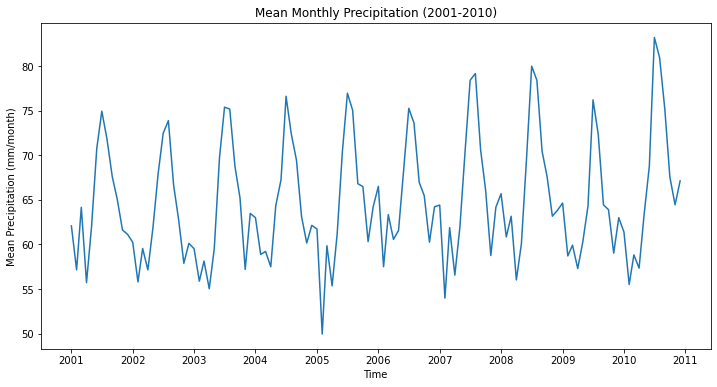

In [12]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series
ax.plot(time_values, precip_values)

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Mean Precipitation (mm/month)')

# Set the title
ax.set_title('Mean Monthly Precipitation (2001-2010)')

# Show the plot
plt.show()